<a href="https://colab.research.google.com/github/jlbh/mlp-integrator/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.11.0


In [14]:
tf.random.set_seed(13)

input_dim = 4
output_dim = 2
hidden1_dim = 5
hidden2_dim = 3

model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden1_dim, activation='relu', input_shape=(input_dim,)),
    tf.keras.layers.Dense(hidden2_dim, activation='relu'),
    tf.keras.layers.Dense(output_dim)
])

model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 5)                 25        
                                                                 
 dense_8 (Dense)             (None, 3)                 18        
                                                                 
 dense_9 (Dense)             (None, 2)                 8         
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [15]:
class TrainingFunc():
  def __init__(self):
    self.val = np.random.uniform(0.2, 1.8)
    self.sqrtv = np.sqrt(self.val)
    self.step = np.random.uniform(0.0001, 0.0199)
    
  def pos(self, t): return np.sin(self.sqrtv * t)
  def vel(self, t): return self.sqrtv * np.cos(self.sqrtv * t)
  def acc(self, t): return -self.val * np.sin(self.sqrtv * t)

ini_training_func = TrainingFunc()

X_train = [[ini_training_func.step, ini_training_func.pos(0), 
                         ini_training_func.vel(0), ini_training_func.acc(0)]]

Y_train = [[ini_training_func.pos(ini_training_func.step), 
                          ini_training_func.vel(ini_training_func.step)]]

for i in range(100_000):
  new_training_func = TrainingFunc()
  rand_t = np.random.uniform(-13, 13)

  new_input_data = [new_training_func.step, new_training_func.pos(rand_t), 
                         new_training_func.vel(rand_t), new_training_func.acc(rand_t)]
  
  new_target_data = [new_training_func.pos(rand_t + new_training_func.step), 
                          new_training_func.vel(rand_t + new_training_func.step)]
  
  X_train.append(new_input_data)
  Y_train.append(new_target_data)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [16]:
history = model.fit(X_train, Y_train)

3126/3126 [==============================] - 7s 2ms/step - loss: 0.0456


In [17]:
class Oscillator:
  def __init__(self, a, h):
    self.a = a
    self.sqrta = np.sqrt(a)
    self.ini = np.array([h, 0, self.sqrta, 0])

  def acc(self, pos):
    return self.a * np.sin(pos)

  def vel(self, t):
    return self.sqrta * np.cos(self.sqrta * t)

  def pos(self, t):
    return np.sin(self.sqrta * t)

h = 0.01
a = 1

oscillator = Oscillator(a, h)
exact_sol = [oscillator.ini[1]]
model_sol = [oscillator.ini[1]]

prediction = model(oscillator.ini.reshape((1, 4)), training=False)

model_sol.append(prediction[0,0])
exact_sol.append(oscillator.pos(h))

for i in range(2, 400):
  input_data = np.array([h, prediction[0,0], prediction[0,1], oscillator.acc(prediction[0,0])]).reshape((1, 4))
  prediction = model(input_data, training=False)
  model_sol.append(prediction[0,0])
  exact_sol.append(oscillator.pos(i * h))

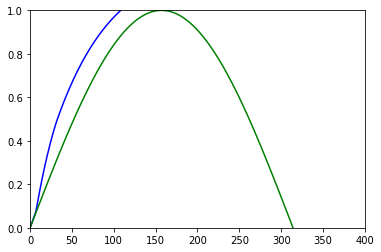

In [18]:
plt.plot(model_sol, 'b')
plt.plot(exact_sol, 'g')
plt.xlim(0, 400)
plt.ylim(0,1)
plt.show()